In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Add, Activation, Conv1D, Conv2D, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

2024-01-13 16:06:57.288491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-13 16:06:57.288540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-13 16:06:57.289686: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-13 16:06:57.295480: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-13 16:06:57.980709: W tensorflow/compiler/tf2

In [2]:
# load the model
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")


In [3]:
# Preprocessing dei dati

train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

# normalizzazione
train_images = (train_images / 255)
test_images = (test_images / 255)

# appiattimento di ogni immagine da un array 28x28 ad un array di 784 pixel
# train_images = train_images.reshape(-1, 28*28) # 784
# test_images = test_images.reshape(-1, 28*28)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
shape_value = train_images.shape[0] # 28x28 -> 784
print(shape_value)

input = Input(shape=(28,28,1)) # posso creare anche custom objects che userò successivamente senza ripetere tutto.

conv_0 = Conv2D(
        64, 
        kernel_size=3, 
        activation='swish', 
        input_shape=(28,28,1) # This is the shape of each input image, 28,28,1 with the 1 signifying that the images are greyscale.
    )(input)

# dense_0 = Dense(units=64, activation='relu')(conv_0)

# residual_0 = Add()([conv_0, dense_0])
# residual_0 = Activation('swish')(residual_0) # torna indietro con la derivata prima parziale della funzione relu

# flatten_0 = Flatten()(residual_0)
flatten_0 = Flatten()(conv_0)

output = Dense(
        units=10, 
        activation='softmax' # Softmax makes the output sum up to 1 so the output can be interpreted as probabilities.
    )(flatten_0)


model = tf.keras.models.Model(
    inputs=[input],
    outputs=[output],
    name="Conv-Test"
)

model.summary()


60000
Model: "Conv-Test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 flatten_1 (Flatten)         (None, 43264)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                432650    
                                                                 
Total params: 433290 (1.65 MB)
Trainable params: 433290 (1.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
history_res = model.fit(
    x=train_images,
    y=train_labels,
    epochs=10,
    batch_size=512,
    validation_data=(
        test_images,
        test_labels
    )
)

Epoch 1/5
118/118 [==============================] - 2s 14ms/step - loss: 0.3828 - accuracy: 0.8870 - val_loss: 0.2843 - val_accuracy: 0.9216
Epoch 2/5
118/118 [==============================] - 2s 13ms/step - loss: 0.2723 - accuracy: 0.9235 - val_loss: 0.2227 - val_accuracy: 0.9366
Epoch 3/5
118/118 [==============================] - 2s 13ms/step - loss: 0.1714 - accuracy: 0.9517 - val_loss: 0.1373 - val_accuracy: 0.9602
Epoch 4/5
118/118 [==============================] - 1s 13ms/step - loss: 0.1185 - accuracy: 0.9667 - val_loss: 0.1071 - val_accuracy: 0.9686
Epoch 5/5
118/118 [==============================] - 2s 13ms/step - loss: 0.0870 - accuracy: 0.9754 - val_loss: 0.0947 - val_accuracy: 0.9707


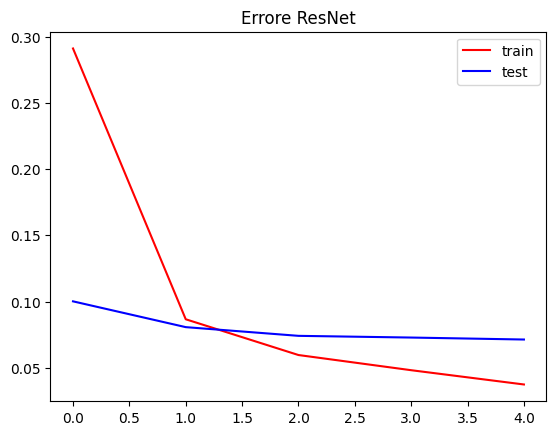

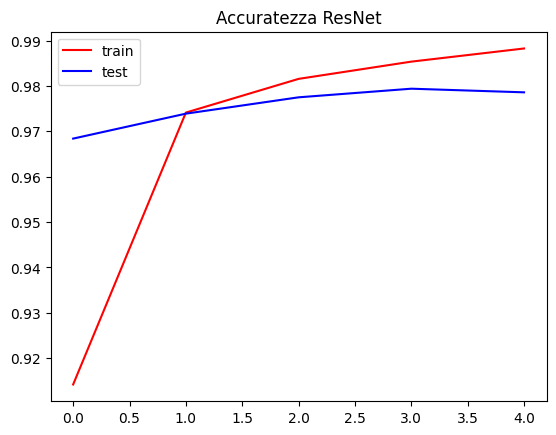

In [7]:
# Stampe i risultati

# errore modello
plt.plot(history_res.history['loss'], color='red', label='train')
plt.plot(history_res.history['val_loss'], color='blue', label='test')
plt.title('Errore ResNet' )
plt.legend()
plt.show()

# Accuratezza del modello
plt.plot(history_res.history['accuracy'], color='red', label='train')
plt.plot(history_res.history['val_accuracy'], color='blue', label='test')
plt.title("Accuratezza ResNet")
plt.legend()
plt.show()

In [8]:
evaluations_res = model.evaluate(
    test_images,
    test_labels
)

for i in range(0, len(model.metrics_names)):
    print(f"{model.metrics_names[i]} -> {evaluations_res[i]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0713 - accuracy: 0.9786
loss -> 0.07133857905864716
accuracy -> 0.978600025177002
